# Raytracing from Python

[Raytracing in one Weekend](https://raytracing.github.io/) tutorial completion that has a Python interface.

## Image data to render

In [1]:
import random
import math

random.seed(1007)

camera = {
    "lookfrom": (13, 2, 3),
    "lookat": (0, 0, 0),
    "vup": (0, 1, 0),
    "vfov": 20,
    "aspect": 16 / 9,
    "aperture": 0.1,
    "focus_distance": 10
}

world = []

#floor
world.append(
    {
        "type": "sphere",
        "center": (0, -1000, 0),
        "radius": 1000,
        "material": {
            "type": "lambertian",
            "albedo": (0.5, 0.5, 0.5)
        }
    }
)

# three big spheres
world.extend([
    {
        "type": "sphere",
        "center": (0, 1, 0),
        "radius": 1.0,
        "material": {
            "type": "dielectric",
            "ref_idx": 1.5
        }
    },
    {
        "type": "sphere",
        "center": (-4, 1, 0),
        "radius": 1.0,
        "material": {
            "type": "lambertian",
            "albedo": (0.4, 0.2, 0.1)
        }
    },
    {
        "type": "sphere",
        "center": (4, 1, 0),
        "radius": 1.0,
        "material": {
            "type": "metal",
            "albedo": (0.7, 0.6, 0.5),
            "fuzz": 0
        }
    }
])

# lots of small spheres

def dist(a, b):
    x = 0
    for i in range(3):
        x += (a[i] - b[i]) * (a[i] - b[i])
    return math.sqrt(x)


for a in range(-11, 11):
    for b in range(-11, 11):
        center = (a + 0.9 * random.random(), 0.2, b + 0.9 * random.random())
        if (dist(center, (4, 0.2, 0))> 0.9):
            material_choice = random.random()
            if material_choice < 0.8:
                world.append({
                    "type": "sphere",
                    "center": center,
                    "radius": 0.2,
                    "material": {
                        "type": "lambertian",
                        "albedo": (
                            random.random() * random.random(),
                            random.random() * random.random(), 
                            random.random() * random.random())}})
            elif material_choice < 0.95:
                world.append({
                    "type": "sphere",
                    "center": center,
                    "radius": 0.2,
                    "material": {
                        "type": "metal",
                        "albedo": (random.uniform(0.5, 1), random.uniform(0.5, 1), random.uniform(0.5, 1)),
                        "fuzz": random.uniform(0, 0.5)
                    }
                })
            else:
                world.append({
                    "type": "sphere",
                    "center": center,
                    "radius": 0.2,
                    "material": {
                        "type": "dielectric",
                        "ref_idx": 1.5
                    }
                })




## CPP17 Raytracer

### Setup

if you haven't already, compile the module with the following code:

In [2]:
%cd cpp17
! python setup.py build_ext --inplace
%cd -

/Users/daria/Documents/ray-tracing/cpp17
Compiling raytracing.pyx because it changed.
[1/1] Cythonizing raytracing.pyx
running build_ext
building 'raytracing' extension
creating build
creating build/temp.macosx-10.9-universal2-3.9
clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -iwithsysroot/System/Library/Frameworks/System.framework/PrivateHeaders -iwithsysroot/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/Headers -Werror=implicit-function-declaration -Wno-error=unreachable-code -I/Users/daria/Documents/ray-tracing/venv/ray-tracing/include -I/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/include/python3.9 -c raytracing.cpp -o build/temp.macosx-10.9-universal2-3.9/raytracing.o -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -iwithsysroot/System/Library/Frameworks/System.framework

### Renders

Now we can import the render function and render the world at several resolutions

In [3]:
import matplotlib.pyplot as plt
from cpp17.raytracing import render as cpp17_render

In [4]:
%time image = cpp17_render(world, camera, h=90, w=160)

CPU times: user 857 ms, sys: 1.67 ms, total: 858 ms
Wall time: 859 ms


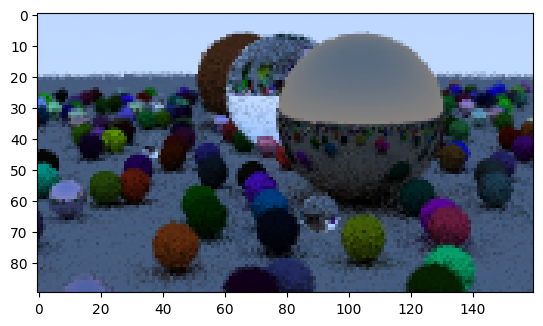

In [5]:
plt.imshow(image)

In [6]:
%time image = cpp17_render(world, camera, h=675, w=1200)

CPU times: user 47.4 s, sys: 88.2 ms, total: 47.5 s
Wall time: 47.2 s


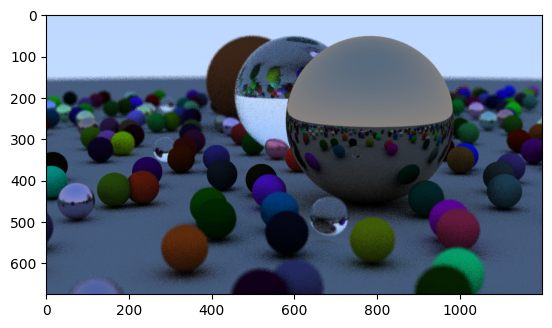

In [7]:
plt.imshow(image)

Here I save the rendered image to disk (to display it in the README)

In [10]:
import numpy as np
from PIL import Image

arr = np.array(image)
img = Image.fromarray(np.uint8(arr * 255), 'RGB')
img.save('out.png')